In [37]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [38]:
import pdfplumber
import pandas as pd
import matplotlib.pyplot as plt
import re
import plotly.express as px
import plotly.graph_objects as go
import numpy as np

plt.style.use('default')

In [39]:
# Import our modules
from b_App.data_ingestion import  *
from b_App.data_processing import *
from b_App.visualizations import *
from a_Configs.config import *

budget_to_end_page = Config.ME_BUDGET_END_PAGES
budget_years = Config.NH_BUDGET_YEARS

In [57]:
from fredapi import Fred
fred = Fred(api_key=Config.FRED_API_KEY)


In [40]:
me_as_reported_df = load_me_budget_as_reported(budget_to_end_page, Config.DATA_DIR_ME)
me_processed_df = process_me_budget(me_as_reported_df)

In [48]:
plot_budget_and_spending(me_processed_df)

In [56]:
plot_small_departments_summary(me_processed_df)

,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027
Funding Source,,,,,,,,,,,,
FEDERAL EXPENDITURES FUND,2035.128390,2055.555394,2100.812805,2185.980072,2522.590122,2881.727266,3145.135310,3166.651132,3292.178239,3534.905849,3889.891453,3892.473179
DEPARTMENT TOTAL ex FEDERAL,1451.653004,1453.023947,1905.656632,2008.750774,2168.721593,2118.311357,2180.994178,2741.931524,2830.232865,3235.501392,3280.656114,3259.694751
GENERAL FUND,811.629906,808.286377,1168.639329,1247.537678,1326.123830,1266.190306,1265.338723,1638.181049,1750.751872,2077.100494,2183.726756,2164.550439
OTHER SPECIAL REVENUE,434.444201,437.289382,501.857500,512.318201,562.391259,574.845298,612.690128,661.347893,648.525893,720.657798,713.753039,721.184967
FEDERAL BLOCK GRANT FUND,153.885304,155.606745,181.301230,194.441203,214.270753,213.240371,224.817577,278.471607,279.653386,283.306083,278.836497,279.501104
FUND FOR A HEALTHY MAINE,50.183464,50.331314,52.352805,52.947924,64.429983,62.529614,49.226873,62.698209,61.562582,63.032048,63.811338,62.788713
FEDERAL EXPENDITURES FUND ARP,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16.796206,23.532250,22.031838,17.220790,15.888726
FEDERAL EXPENDITURES FUND ARP SFR,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,27.415109,30.458835,12.513474,9.629802,9.629802,9.629802
MAINE RECOVERY FUND,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.150000,6.150000,6.150000


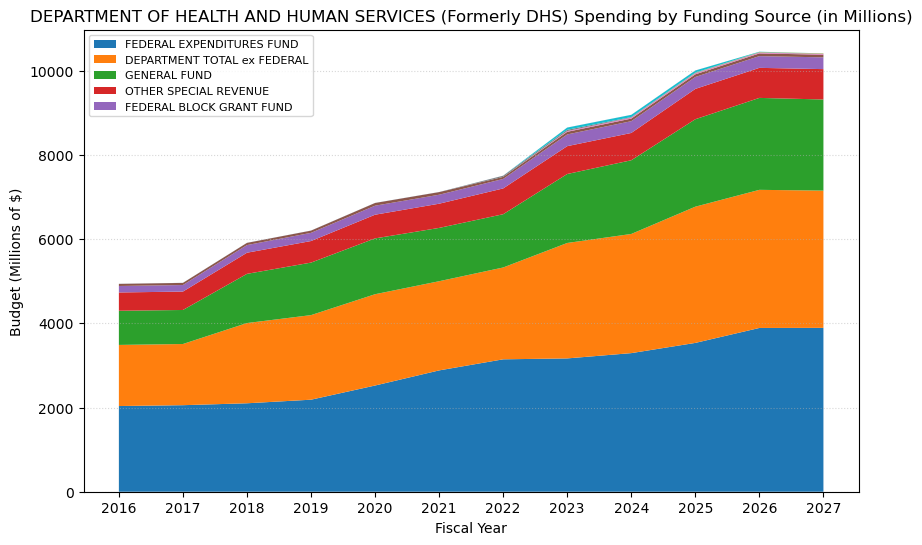

In [63]:
fig, ax = plt.subplots(figsize=(10, 6))
plot_department_breakdown(ax, 'DEPARTMENT OF HEALTH AND HUMAN SERVICES (Formerly DHS)', me_processed_df, fred)

In [62]:
me_processed_df.sort_values(by='2024', ascending=False).head(10)

2016  \
Department                                         Funding Source                              
TOTAL                                              DEPARTMENT TOTAL             8.217277e+09   
                                                   DEPARTMENT TOTAL ex FEDERAL  5.488956e+09   
DEPARTMENT OF HEALTH AND HUMAN SERVICES (Former... DEPARTMENT TOTAL             3.486781e+09   
TOTAL                                              GENERAL FUND                 3.331299e+09   
                                                   FEDERAL EXPENDITURES FUND    2.728321e+09   
DEPARTMENT OF HEALTH AND HUMAN SERVICES (Former... FEDERAL EXPENDITURES FUND    2.035128e+09   
                                                   DEPARTMENT TOTAL ex FEDERAL  1.451653e+09   
DEPARTMENT OF EDUCATION                            DEPARTMENT TOTAL             1.432526e+09   
TOTAL                                              OTHER SPECIAL REVENUE        1.049691e+09   
DEPARTMENT OF EDUCATION                            DEPARTMENT TOTAL ex FEDERAL  1.209585e+09   

                                                                                        2017  \
Department                                         Funding Source                              
TOTAL                                              DEPARTMENT TOTAL             8.307662e+09   
                                                   DEPARTMENT TOTAL ex FEDERAL  5.560601e+09   
DEPARTMENT OF HEALTH AND HUMAN SERVICES (Former... DEPARTMENT TOTAL             3.508579e+09   
TOTAL                                              GENERAL FUND                 3.373180e+09   
                                                   FEDERAL EXPENDITURES FUND    2.747061e+09   
DEPARTMENT OF HEALTH AND HUMAN SERVICES (Former... FEDERAL EXPENDITURES FUND    2.055555e+09   
                                                   DEPARTMENT TOTAL ex FEDERAL  1.453024e+09   
DEPARTMENT OF EDUCATION                            DEPARTMENT TOTAL             1.445586e+09   
TOTAL                                              OTHER SPECIAL REVENUE        1.077801e+09   
DEPARTMENT OF EDUCATION                            DEPARTMENT TOTAL ex FEDERAL  1.222551e+09   

                                                                                        2018  \
Department                                         Funding Source                              
TOTAL                                              DEPARTMENT TOTAL             8.521222e+09   
                                                   DEPARTMENT TOTAL ex FEDERAL  5.730272e+09   
DEPARTMENT OF HEALTH AND HUMAN SERVICES (Former... DEPARTMENT TOTAL             4.006469e+09   
TOTAL                                              GENERAL FUND                 3.514674e+09   
                                                   FEDERAL EXPENDITURES FUND    2.790950e+09   
DEPARTMENT OF HEALTH AND HUMAN SERVICES (Former... FEDERAL EXPENDITURES FUND    2.100813e+09   
                                                   DEPARTMENT TOTAL ex FEDERAL  1.905657e+09   
DEPARTMENT OF EDUCATION                            DEPARTMENT TOTAL             1.529265e+09   
TOTAL                                              OTHER SPECIAL REVENUE        1.049875e+09   
DEPARTMENT OF EDUCATION                            DEPARTMENT TOTAL ex FEDERAL  1.295591e+09   

                                                                                        2019  \
Department                                         Funding Source                              
TOTAL                                              DEPARTMENT TOTAL             8.902010e+09   
                                                   DEPARTMENT TOTAL ex FEDERAL  6.021270e+09   
DEPARTMENT OF HEALTH AND HUMAN SERVICES (Former... DEPARTMENT TOTAL             4.194731e+09   
TOTAL                                              GENERAL FUND                 3.708230e+09   
                                                   FE